# Espacios de color

Existen muchisimos tipos de espacios de color, esto quiere decir que el valor de un color, segun el espacio donde uno se encuentra, se pesa con distintos parametros.

## Espacio HSV

Es una representación circular de la siguiente forma:
* H: Matiz (Angulo) [0-180] <- OpenCV
* S: Saturación [0-255]
* V: Valor [0-255]

![alt text](img/HSV_cone.jpg "HSV")



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
hsv = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('H','image',0,180,nothing)
cv2.createTrackbar('S','image',0,255,nothing)
cv2.createTrackbar('V','image',0,255,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27: #Presionar tecla 'esc' para cerrar
        break

    # get current positions of four trackbars
    h = cv2.getTrackbarPos('H','image')
    s = cv2.getTrackbarPos('S','image')
    v = cv2.getTrackbarPos('V','image')

    hsv[:] = [h,s,v]
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

cv2.destroyAllWindows()


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def nothing(x):
    pass

hminsv = np.zeros((100,200,3), np.uint8)
hmaxsv = np.zeros((100,200,3), np.uint8)

cv2.namedWindow('mask')
cap = cv2.VideoCapture(0)
# create trackbars for color change
cv2.createTrackbar('Hmin','mask',0,180,nothing)
cv2.createTrackbar('Hmax','mask',0,180,nothing)
cv2.createTrackbar('S','mask',0,255,nothing)
cv2.createTrackbar('V','mask',0,255,nothing)

while(1):

    # Captura un frame
    _, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    hmin = cv2.getTrackbarPos('Hmin','mask')
    hmax = cv2.getTrackbarPos('Hmax','mask')
    s = cv2.getTrackbarPos('S','mask')
    v = cv2.getTrackbarPos('V','mask')
    lower_green = np.array([hmin,s,v])
    upper_green = np.array([hmax,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    hminsv[:] = [hmin,s,v]
    hsv_min = cv2.cvtColor(hminsv, cv2.COLOR_HSV2BGR)
    hmaxsv[:] = [hmax,s,v]
    hsv_max = cv2.cvtColor(hmaxsv, cv2.COLOR_HSV2BGR)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    cv2.imshow('hsv_min',hminsv)
    cv2.imshow('hsv_max',hmaxsv)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

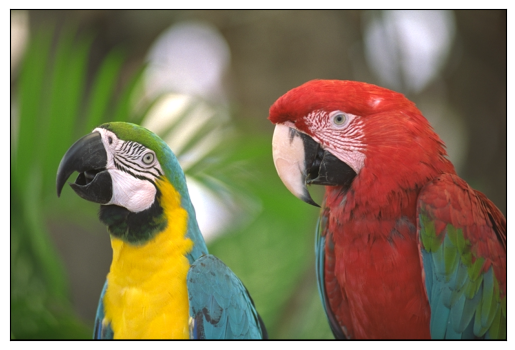

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
myPath=''
loros = cv.imread(myPath+'img/kodim23.png',1)
lorosc = cv.cvtColor(loros, cv.COLOR_BGR2RGB) # Matplotlib espera RGB
plt.xticks([]),plt.yticks([])
plt.imshow(lorosc)

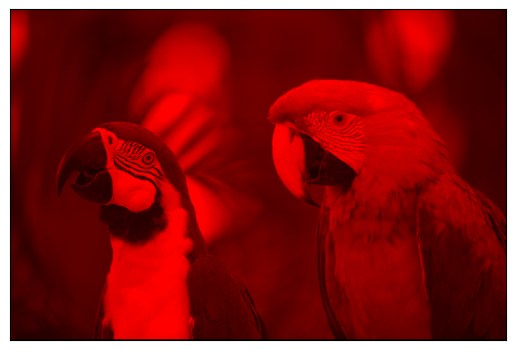

In [34]:
# Separo solo el canal rojo de la imagen
r = lorosc.copy()
# seteamos canales verde y azul en 0
r[:, :, 1] = 0
r[:, :, 2] = 0

# RGB - Rojo
plt.xticks([]),plt.yticks([])
plt.imshow(r)
#rojo = cv.cvtColor(r, cv.COLOR_RGB2BGR)
#cv.imwrite('img/loros_r.png',rojo)

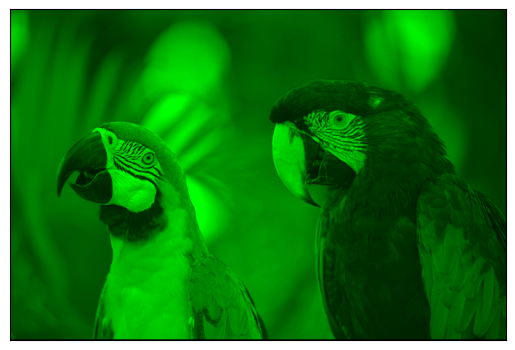

In [36]:
# Separo solo el canal verde de la imagen
g = lorosc.copy()
# seteamos canales rojo y azul en 0
g[:, :, 0] = 0
g[:, :, 2] = 0

# RGB - Verde
plt.xticks([]),plt.yticks([])
plt.imshow(g)
#verde = cv.cvtColor(g, cv.COLOR_RGB2BGR)
#cv.imwrite('img/loros_g.png',verde)

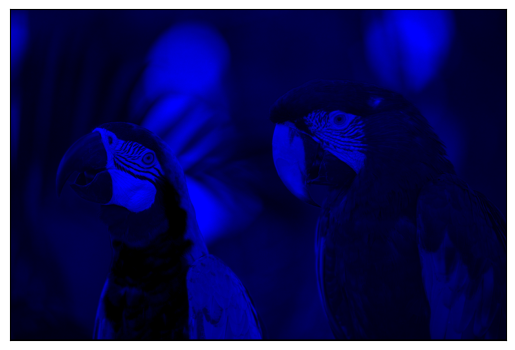

In [38]:
# Separo solo el canal azul de la imagen
b = lorosc.copy()
# seteamos canales rojo y verde en 0
b[:, :, 0] = 0
b[:, :, 1] = 0

# RGB - Azul
plt.xticks([]),plt.yticks([])
plt.imshow(b)
#azul = cv.cvtColor(b, cv.COLOR_RGB2BGR)
#cv.imwrite('img/loros_b.png',azul)